# 1. Data preprocessing

## Importing the relevant libraries and datasets

In [92]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('Datasets/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df=pd.read_csv('Datasets/test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, the above data is divided into training and testing datasets. We will also create a separate validation dataset. The label section in the training dataset tells us the actual digit that the model must accurately determine.


Since we are dealing with image data in the form of pixel values, we will need to preprocess our data for it to be fed into the neural network.


## Visualising the data

Let us check how the data actually can be visualised. For this purpose, we need to reshape our 1D data into 2D data of matrix of 28X28. This will give us an idea how actually the data looks like.

In [90]:
temp_df=train_df.copy()
temp_df.drop('label',axis=1,inplace=True)
temp_df=np.array(temp_df).reshape(-1,28,28,1)
temp_df.shape

(42000, 28, 28, 1)

The number is:3


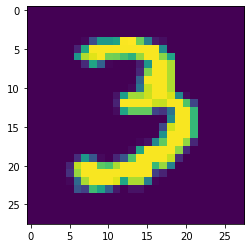

In [111]:
labels=train_df['label']
plt.imshow(temp_df[9][:,:,0])
print('The number is:{}'.format(labels[9]))

## Extracting data from the csv files

After glancing through the training dataframe, we can realise that the first column named as label is the target column while everything else are inputs for the nueral net.

Let us try to separate this data.

In [4]:
unscaled_inputs=train_df.iloc[:,1:].values

In [5]:
targets=train_df.iloc[:,0].values

## Standardize the inputs

In [6]:
scaled_inputs=preprocessing.scale(unscaled_inputs)

## Shuffling the data

In case the data was arranged in some particular order, we would want to remove any bias by shuffling the data completely. This will make the dataset more homogeneous in nature and prevent any undue bias in the model.

In [7]:
total_indices=scaled_inputs.shape[0]

In [8]:
print('Total amount of data in the training dataset: {}'.format(total_indices))

Total amount of data in the training dataset: 42000


Let us now shuffle all these 42000 indices to make the data homogeneous in nature.

In [9]:
shuffled_indices=np.arange(total_indices)

In [10]:
np.random.shuffle(shuffled_indices)

In [11]:
shuffled_indices

array([26098, 19445, 20483, ...,  4149,   951, 40079])

As we can see, the indices have now been all shuffled.

In [12]:
shuffled_inputs=scaled_inputs[shuffled_indices]
shuffled_targets=targets[shuffled_indices]

## Splitting the dataset into train,validation and test sets

In [13]:
samples_count=total_indices

train_samples_count=int(0.8*samples_count)
validation_samples_count=int(0.1*samples_count)
test_samples_count=samples_count-train_samples_count-validation_samples_count

As we can see from above few codes, we have allocated **80%** of the dataset for **training** , **10%** for **cross validation** and the remaining **10%** for **testing purpose**.

In [14]:
train_inputs=shuffled_inputs[:train_samples_count]
train_targets=shuffled_targets[:train_samples_count]

validation_inputs=shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets=shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs=shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets=shuffled_targets[train_samples_count+validation_samples_count:]

From the above code, we have separated all the train, validation and test data and separated the inputs from the targets aswell.

## Saving the three datasets into .npz form to be used in further neural network

In [15]:
np.savez('MNIST_train',inputs=train_inputs,target=train_targets)
np.savez('MNIST_validation',inputs=validation_inputs,target=validation_targets)
np.savez('MNIST_test',inputs=test_inputs,target=test_targets)

## Loading the NPZ files

In [16]:
npz=np.load('MNIST_train.npz')
train_inputs=npz['inputs'].astype(np.float)
train_targets=npz['target'].astype(np.int)

In [17]:
npz=np.load('MNIST_test.npz')
test_inputs=npz['inputs'].astype(np.float)
test_targets=npz['target'].astype(np.int)

In [18]:
npz=np.load('MNIST_validation.npz')
validation_inputs=npz['inputs'].astype(np.float)
validation_targets=npz['target'].astype(np.int)

# 2. Deep learning model

## Creating the neural network model

From the .CSV files, it is clear that we have the values for a total of **784 pixels** for each digit. This means,it is in the form of a rank 3 tensor as **28 X 28 X 1** . 

The above situation is a problem because it is not possible to feed these values as input in simple neural networks. For convolutional neural networks, there is no issue with such a tensor input. In this case however, we need to apply the layer flattening option provided by Keras.


As we have 784 pixels for each digit, so, out input nodes (or values) will be 784.

Let us take the number of hidden layers as 50

The digits may range from 0-9. Hence, the number of output values is taken as 10


We are implementing **three sets of hidden layers** initially.
The activation function we plan to use for the hidden layer is **'Relu'**


For backpropogation of the output layer, the activation function used is **Softmax** 

In [19]:
input_size=784
output_size=10
hidden_layer_size=50

model=tf.keras.Sequential([
    #Input layer
    tf.keras.layers.Dense(input_size),
    
    #Hidden layer 1
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 2
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 3
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    
    #Output layer
    tf.keras.layers.Dense(output_size,activation='softmax')
])

## Choosing the optimizer and the loss function

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the dataset


We have an option of setting an early stopping criteria which checks the steps where the validation loss increases in the subsequent steps. We can set it to any value less than the numer of epochs. This helps to control the overfit issue. However, since we have already used the validation datasets, we will comment out the code in the model.




In [21]:
NUM_EPOCHS=50
BATCH_SIZE=100

early_stopping=tf.keras.callbacks.EarlyStopping(patience=20)

model.fit(train_inputs,train_targets,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(validation_inputs,validation_targets),
          verbose=2,validation_steps=10)

Train on 33600 samples, validate on 4200 samples
Epoch 1/50
33600/33600 - 3s - loss: 0.3291 - accuracy: 0.9032 - val_loss: 0.0615 - val_accuracy: 0.9290
Epoch 2/50
33600/33600 - 3s - loss: 0.1624 - accuracy: 0.9508 - val_loss: 0.0591 - val_accuracy: 0.9500
Epoch 3/50
33600/33600 - 3s - loss: 0.1244 - accuracy: 0.9622 - val_loss: 0.0628 - val_accuracy: 0.9510
Epoch 4/50
33600/33600 - 3s - loss: 0.1046 - accuracy: 0.9677 - val_loss: 0.0666 - val_accuracy: 0.9510
Epoch 5/50
33600/33600 - 3s - loss: 0.0859 - accuracy: 0.9740 - val_loss: 0.0797 - val_accuracy: 0.9460
Epoch 6/50
33600/33600 - 3s - loss: 0.0792 - accuracy: 0.9757 - val_loss: 0.0759 - val_accuracy: 0.9540
Epoch 7/50
33600/33600 - 3s - loss: 0.0689 - accuracy: 0.9786 - val_loss: 0.0808 - val_accuracy: 0.9540
Epoch 8/50
33600/33600 - 3s - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0805 - val_accuracy: 0.9550
Epoch 9/50
33600/33600 - 3s - loss: 0.0650 - accuracy: 0.9793 - val_loss: 0.0825 - val_accuracy: 0.9580
Epoch 10/50
336

## Testing the model

Initial testing on a part of the training data will be first done to check how the neural net performs.

In [22]:
test_loss,test_accuracy=model.evaluate(test_inputs,test_targets)

4200/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [23]:
print('\n Test loss:{0:.2f} Test accuracy: {1:.2f} %'.format(test_loss,test_accuracy*100))


 Test loss:0.29 Test accuracy: 95.95 %


In [24]:
values=model.predict(test_inputs)

In [25]:
pd.DataFrame(values).head()

,0,1,2,3,4,5,6,7,8,9
0,4.415834e-15,5.455898e-18,2.821631e-11,1.181066e-12,9.883411e-06,8.917057e-17,9.999901e-01,1.087264e-10,1.014321e-13,1.428183e-11
1,2.085989e-18,3.851270e-17,1.000000e+00,4.407249e-09,8.535022e-12,5.025899e-24,4.345690e-16,9.076806e-12,1.701322e-17,5.489170e-24
2,6.586148e-21,4.799645e-16,1.440780e-15,1.001537e-11,5.611344e-12,6.831884e-15,2.035847e-20,2.440467e-14,1.000000e+00,3.522809e-14
3,5.723538e-01,7.818094e-06,4.131251e-01,2.463292e-04,1.346367e-02,5.499769e-09,2.288739e-05,1.321579e-04,7.600861e-06,6.406320e-04
4,9.999369e-01,6.042089e-15,8.142610e-11,1.454896e-13,1.516082e-09,1.007830e-13,6.302993e-05,1.249079e-10,3.933705e-10,2.307718e-12


As we can see, the entries which have 1 are corresponding to the digits of their column name. 

## Final testing on new dataset

Once the model has been completely trained, we import the test dataset provided to us.

In [26]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
unscaled_inputs_test=test_df.values
scaled_inputs=preprocessing.scale(unscaled_inputs_test)

Unlike the training dataset, we shall not shuffle the testing  dataset since we need to preserve the order for submission purpose.

In [28]:
test_inputs=scaled_inputs

In [29]:
test_inputs.shape

(28000, 784)

As we can see, we have 28000 different images with their pixel intensities.

In [30]:
np.savez('Final_test',inputs=test_inputs)

In [31]:
npz_test=np.load('Final_test.npz')
test_inputs=npz_test['inputs'].astype(float)

In [32]:
values_df=pd.DataFrame(model.predict(test_inputs))

In [33]:
values_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.661430e-23,1.376160e-17,1.000000e+00,1.486765e-15,2.398205e-17,1.196602e-29,5.175150e-21,6.387731e-12,3.383143e-19,9.215675e-29
1,9.999993e-01,4.373790e-25,7.494484e-07,6.076250e-18,1.002362e-17,5.060964e-18,3.040622e-18,1.230966e-18,2.708268e-14,6.680180e-18
2,1.252256e-10,5.373651e-08,1.895910e-05,2.111419e-03,9.475100e-06,1.691442e-05,8.682410e-12,1.810962e-07,6.616736e-06,9.978364e-01
3,8.429906e-04,1.864625e-05,3.480628e-01,4.770881e-03,4.819701e-02,2.130716e-01,1.084828e-05,8.939158e-04,1.004765e-03,3.831265e-01
4,1.766969e-18,9.827378e-10,3.586978e-10,1.000000e+00,2.977061e-19,4.276884e-10,6.664387e-23,1.296215e-13,3.363077e-11,4.588423e-12


We need to sort out the labels for each entry now. We can convert every element in the dataframe into int datatype such that we have only 1s and 0s to make it more readable.

In [34]:

values_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.661430e-23,1.376160e-17,1.000000e+00,1.486765e-15,2.398205e-17,1.196602e-29,5.175150e-21,6.387731e-12,3.383143e-19,9.215675e-29
1,9.999993e-01,4.373790e-25,7.494484e-07,6.076250e-18,1.002362e-17,5.060964e-18,3.040622e-18,1.230966e-18,2.708268e-14,6.680180e-18
2,1.252256e-10,5.373651e-08,1.895910e-05,2.111419e-03,9.475100e-06,1.691442e-05,8.682410e-12,1.810962e-07,6.616736e-06,9.978364e-01
3,8.429906e-04,1.864625e-05,3.480628e-01,4.770881e-03,4.819701e-02,2.130716e-01,1.084828e-05,8.939158e-04,1.004765e-03,3.831265e-01
4,1.766969e-18,9.827378e-10,3.586978e-10,1.000000e+00,2.977061e-19,4.276884e-10,6.664387e-23,1.296215e-13,3.363077e-11,4.588423e-12


In [54]:
values_df=values_df[values_df>0.3]

In [55]:
values_df.fillna(0,inplace=True)
values_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997836
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [72]:
predictions_df=pd.DataFrame(values_df[values_df>0.3].stack())

In [73]:
predictions_df.drop(0,axis=1,inplace=True)

In [74]:
predictions_df.head()

,
0,2
1,0
2,9
4,3
5,7


The neural net could predict for the above number of cases. Rest could not be identified.

Let us organise the dataframe properly.

In [75]:
predictions_df.reset_index(inplace=True)

In [76]:
predictions_df.rename(columns={'level_1':'Label'},inplace=True)
predictions_df.head()

,level_0,Label
0,0,2
1,1,0
2,2,9
3,4,3
4,5,7


In [77]:
image_id=pd.DataFrame(np.arange(0,28000),columns=['ImageId'])
image_id['ID']=image_id['ImageId']
image_id.head()

,ImageId,ID
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [78]:

predictions_df.rename(columns={'level_0':'ImageId'},inplace=True)

In [79]:
predictions_df.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,4,3
4,5,7


In [80]:
final_preds=predictions_df.copy()

In [81]:
final_preds=pd.merge_ordered(final_preds,image_id,on='ImageId',fill_method='None')

In [82]:
final_preds['Label'].isna().value_counts()

False    27923
True        77
Name: Label, dtype: int64

Sadly, we could not recognize about few test cases. Let us see the various results amongst the recognized numbers.

In [83]:
final_preds['Label'].value_counts()

1.0    3039
7.0    2992
2.0    2895
9.0    2835
3.0    2790
6.0    2757
0.0    2757
8.0    2701
4.0    2682
5.0    2475
Name: Label, dtype: int64

In a brute and inaccurate manner, we will fill the null values with mode of the Label column.

In [84]:
final_preds['Label'].fillna(final_preds['Label'].mode()[0],inplace=True)

In [85]:
final_preds=final_preds.astype(int)

In [86]:
final_preds['ImageId']=final_preds['ImageId']+1

In [87]:
final_preds.drop('ID',axis=1,inplace=True)
final_preds.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,1
4,5,3
